In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("airline-passenger-traffic+(1).csv",header=None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'],format="%Y-%m")
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [3]:
data[data['Passengers'].isna()]

,Passengers
Month,
1951-06-01,NaN
1951-07-01,NaN
1954-06-01,NaN
1960-03-01,NaN


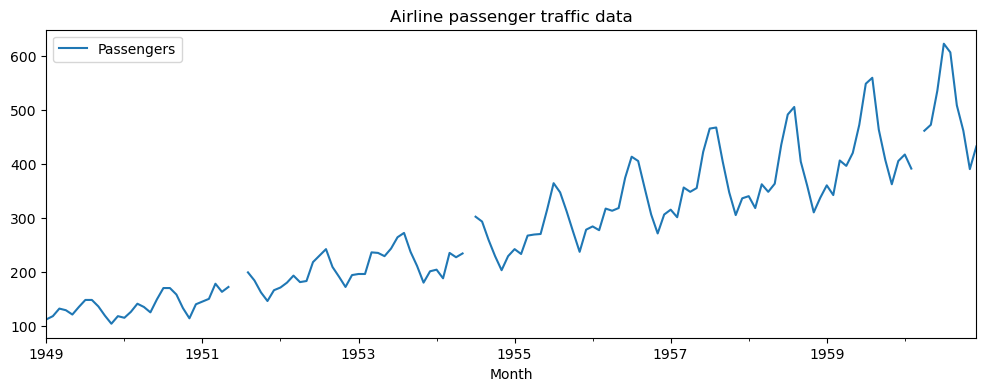

In [4]:
### Plotting the time series data
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline passenger traffic data")
plt.show(block=False)

### Missing Value Treatment

In [5]:
data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))

,Passengers,Passengers_Mean_Imputation
Month,,
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
...,...,...
1960-08-01,606.0,606.0
1960-09-01,508.0,508.0
1960-10-01,461.0,461.0


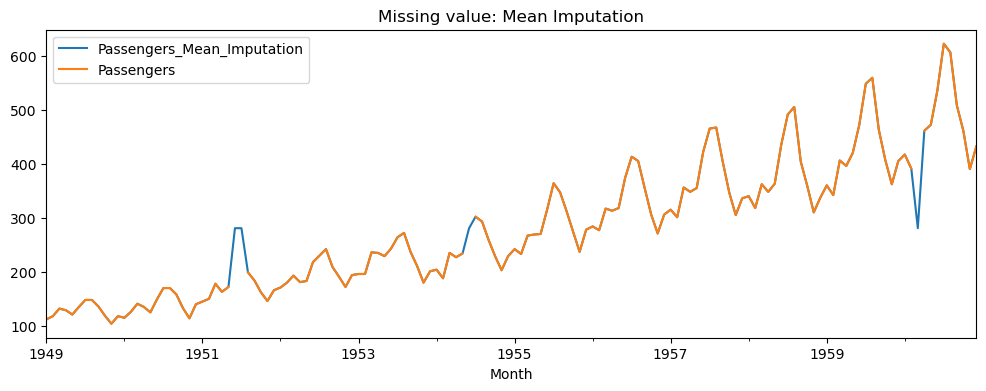

In [6]:
## Mean imputation
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12,4))
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Missing value: Mean Imputation")
plt.show(block=False)

### Linear Interpolation

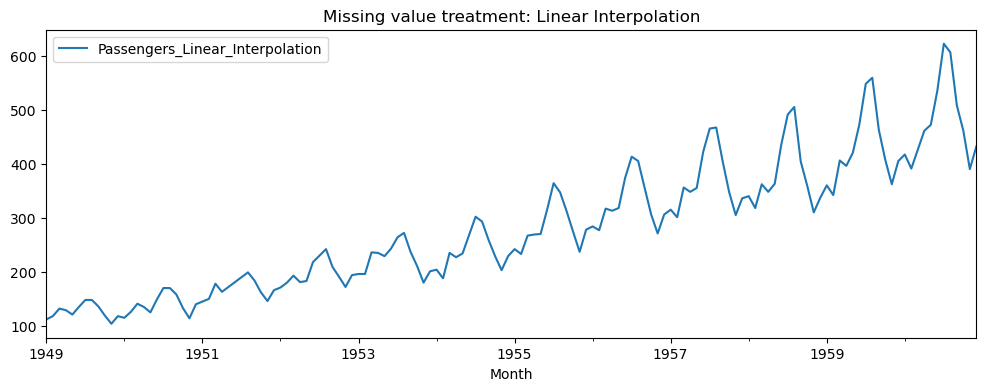

In [7]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
plt.legend(loc="best")
plt.title("Missing value treatment: Linear Interpolation")
plt.show(block=False)

In [8]:
data['Passengers']  = data['Passengers_Linear_Interpolation']

### Handling Outliers

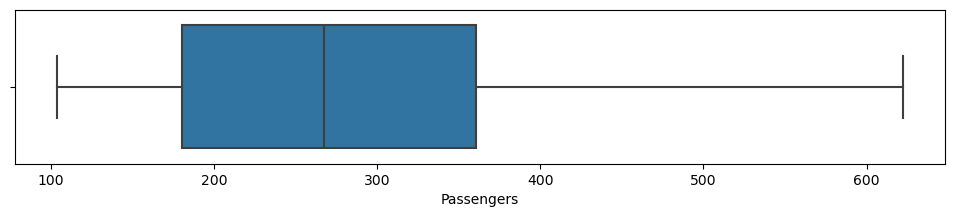

In [9]:
### Box plot and interquartile range
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'],whis=1.5)

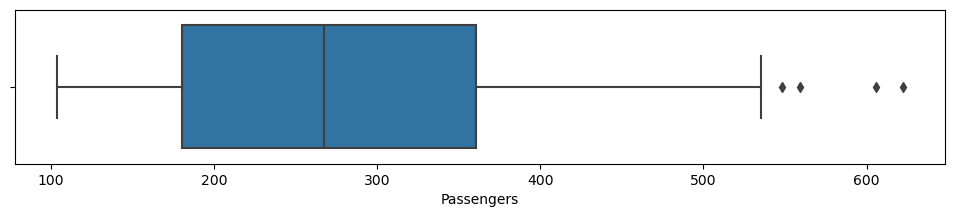

In [10]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'],whis=1)

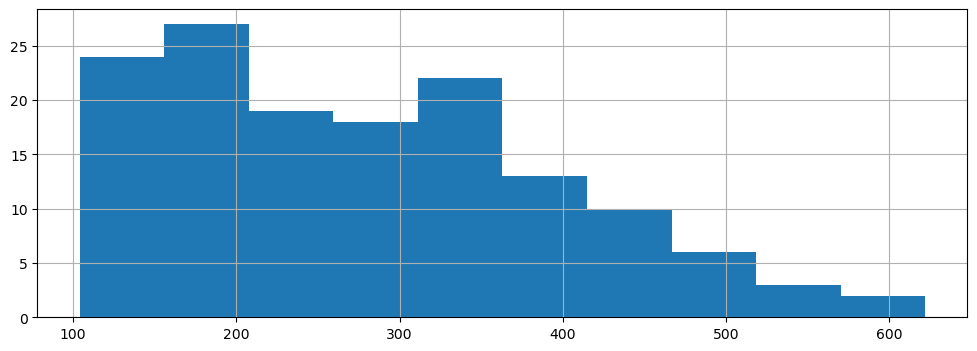

In [11]:
### Plotting histogram
fig = data.Passengers.hist(figsize=(12,4))

### Time Series Decomposition

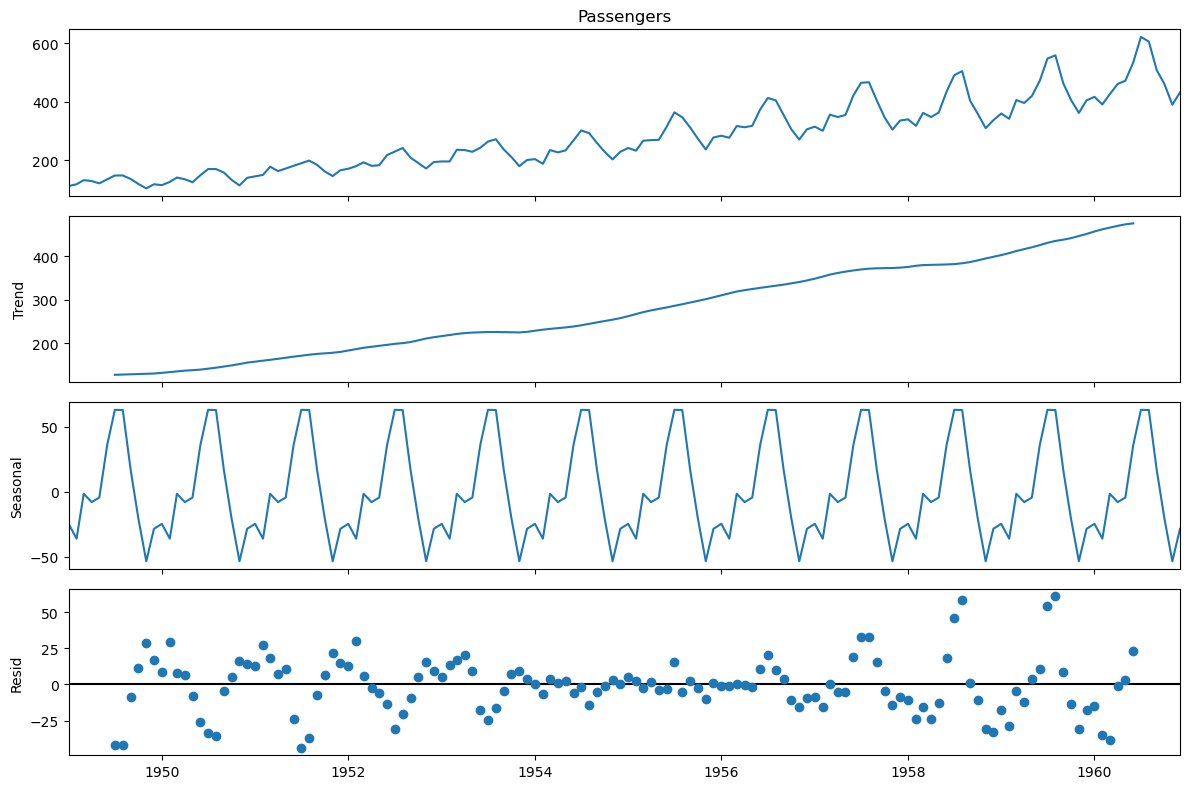

In [12]:
### Additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers,model='additive')
fig = decomposition.plot()
plt.show()

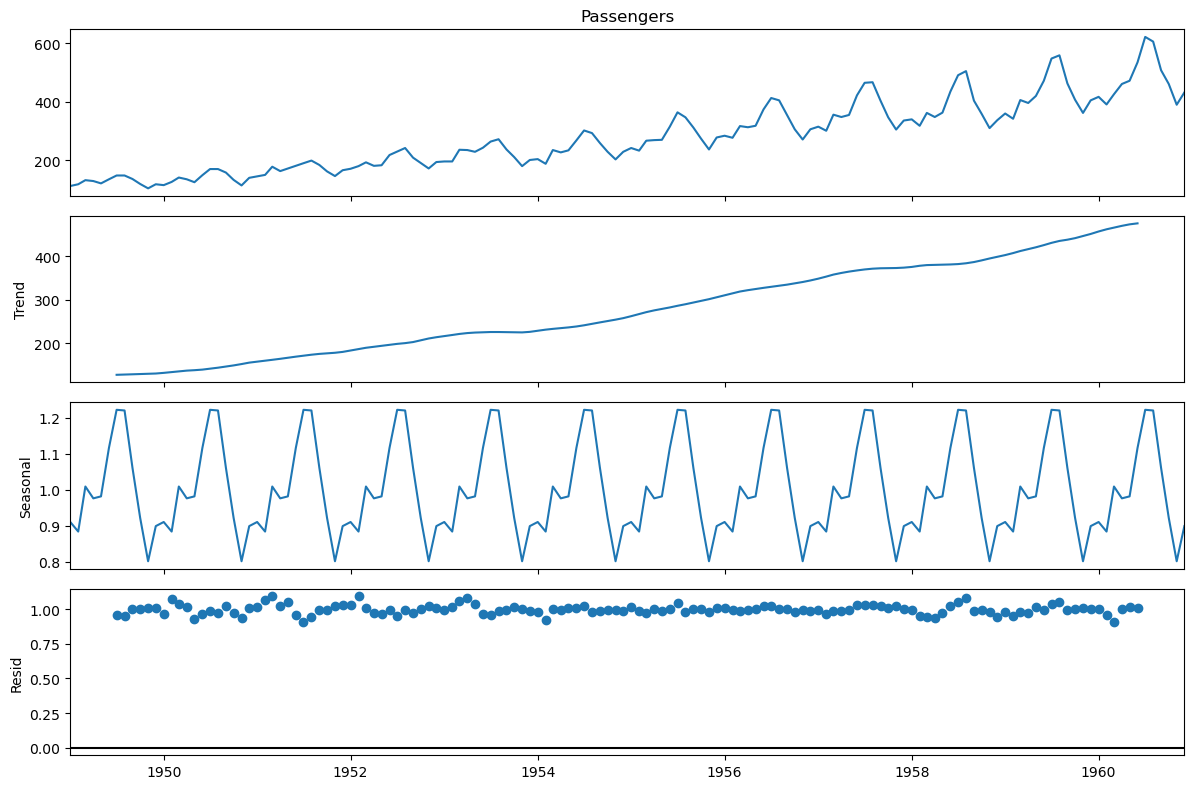

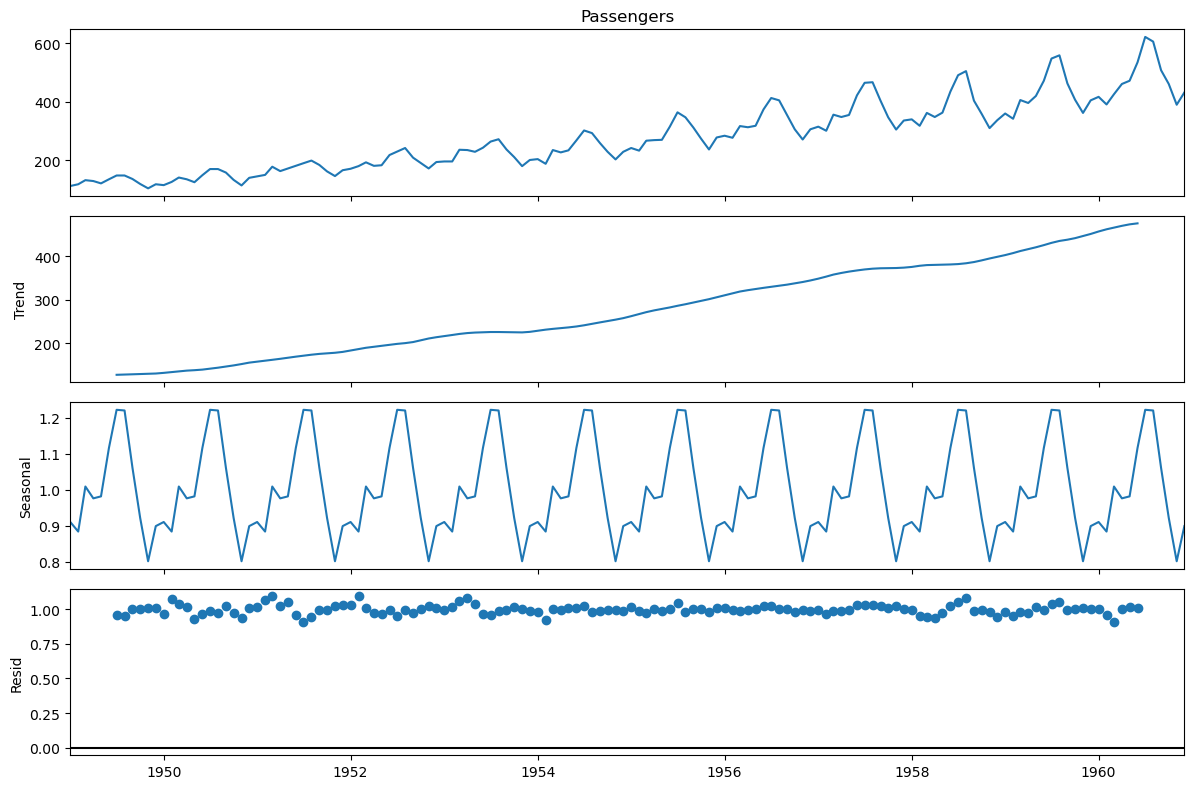

In [13]:
### Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(data.Passengers,model='multiplicative')
decomposition.plot()


### BUILD AND EVALUATE TIME SERIES FORECAST

In [14]:
## Splitting time series into training and testing sets
train_len=120
train = data[0:train_len]
test = data[train_len:]

In [15]:
### Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

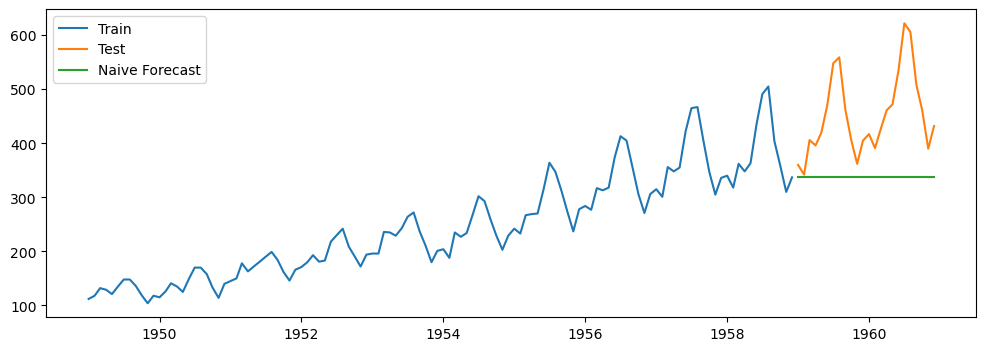

In [16]:
## Plotting train, test and forecast 
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='Naive Forecast')
plt.legend(loc='best')
plt.show()

In [17]:
### Simple Average Method
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

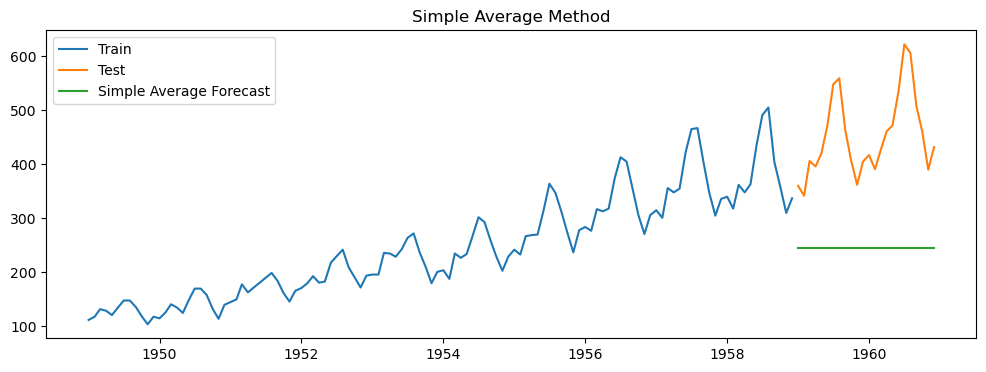

In [18]:
### Plotting train, test and simple average forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [19]:
### Calculating RMSE and MAPE to evaluate forecast
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers']*100),2)

results = pd.DataFrame({'Method':"Naive Method",'MAPE':[mape],'RMSE':[rmse]})

In [20]:
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51


In [21]:
### Calculating the RMSE and MAPE to evaluate Simple Average Method
rmse = np.round(np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forecast'])),2)
mape = np.mean(np.abs(test['Passengers']- y_hat_avg['avg_forecast'])/test['Passengers']*100).round(2)
results.loc[len(results)] = ['Simple Average',mape,rmse]
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
1,Simple Average,44.28,219.69


In [22]:
### SIMPLE MOVING AVERAGE
y_hat_sma = data.copy()
ma_window=12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

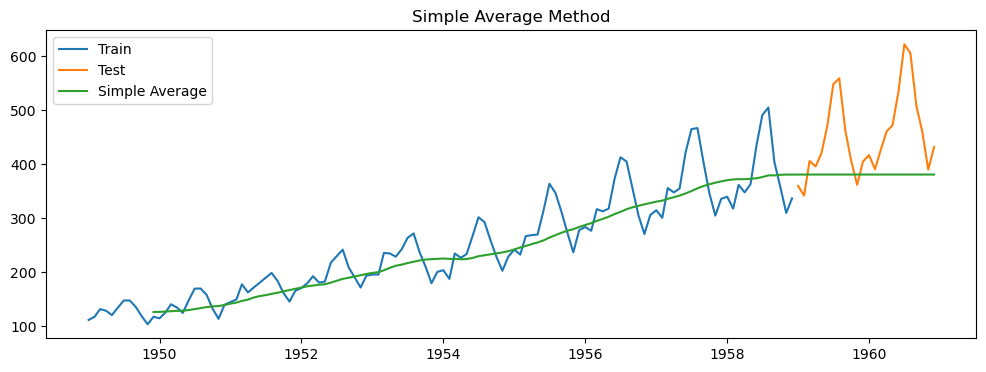

In [23]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Average')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [24]:
### Calculating the RMSE and MAPE to evaluate Simple Moving Average Method
rmse = np.round(np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])),2)
mape = np.mean(np.abs(test['Passengers']- y_hat_sma['sma_forecast'][train_len:])/test['Passengers']*100).round(2)
results.loc[len(results)] = ['Simple Moving Average',mape,rmse]
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
1,Simple Average,44.28,219.69
2,Simple Moving Average,15.54,103.33


In [25]:
### Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast']= model_fit.forecast(24)

C:\Users\Prince\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2, optimized=False)
model.params

C:\Users\Prince\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model.forecast(24)

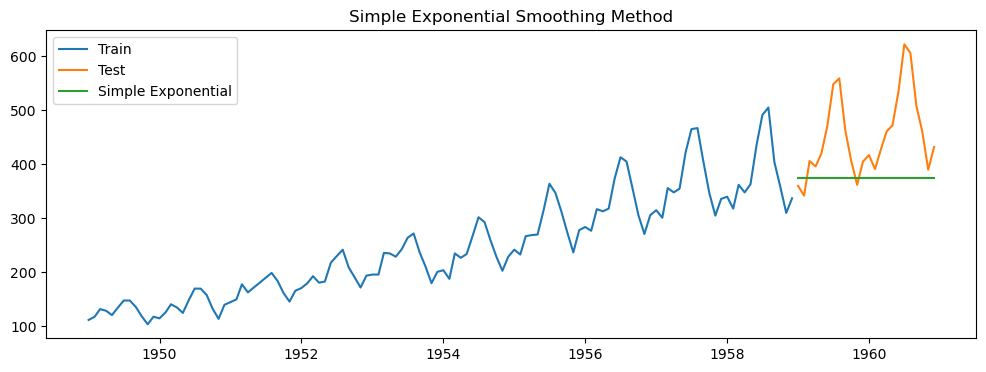

In [36]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='Simple Exponential')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [30]:
### Calculating the RMSE and MAPE to evaluate Simple Moving Average Method
rmse = np.round(np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])),2)
mape = np.mean(np.abs(test['Passengers']- y_hat_ses['ses_forecast'])/test['Passengers']*100).round(2)
results.loc[len(results)] = ['Simple Exponential Smoothing',mape,rmse]
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
1,Simple Average,44.28,219.69
2,Simple Moving Average,15.54,103.33
3,Simple Exponential Smoothing,16.49,107.65


### HOLT'S EXPONENTIAL SMOOTHING

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
## by mentioning seasonal periods here we are mentioning it to the model that we are expecting seasonality every 12 months however we would not be using it.
# because the trend is linear we use the additive in trend, in case of geometric trend we use multiplicative
## seasonal = None because we are not capturing seasonality here
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)
print(model_fit.params)
y_hat_hes = test.copy()
y_hat_hes['hes_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.060606060606069, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


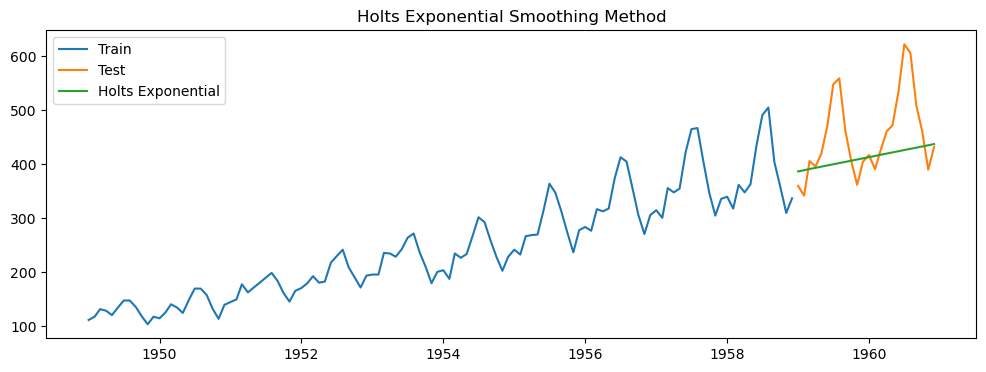

In [41]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hes['hes_forecast'],label='Holts Exponential')
plt.legend(loc='best')
plt.title("Holts Exponential Smoothing Method")
plt.show()

In [42]:
### Calculating the RMSE and MAPE to evaluate Simple Moving Average Method
rmse = np.round(np.sqrt(mean_squared_error(test['Passengers'],y_hat_hes['hes_forecast'])),2)
mape = np.mean(np.abs(test['Passengers']- y_hat_hes['hes_forecast'])/test['Passengers']*100).round(2)
results.loc[len(results)] = ['Holts Exponential Smoothing',mape,rmse]
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
1,Simple Average,44.28,219.69
2,Simple Moving Average,15.54,103.33
3,Simple Exponential Smoothing,16.49,107.65
4,Holts Exponential Smoothing,11.39,80.91


### HOLT WINTERS ADDITIVE METHOD

In [43]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2361171978116132, 'smoothing_trend': 7.679615363850196e-11, 'smoothing_seasonal': 0.7638828018270181, 'damping_trend': nan, 'initial_level': 119.14045289095831, 'initial_trend': 2.2766888689244404, 'initial_seasons': array([ -9.41693238,  -3.89040624,   8.62486483,   3.53570972,
        -5.16150036,   8.98263745,  21.24863145,  19.32984306,
         5.24250075, -13.60564542, -28.28759186, -12.13664608]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


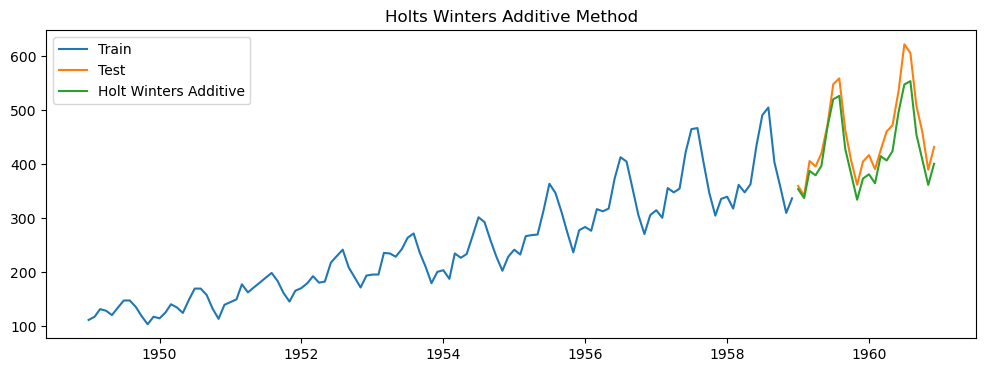

In [44]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hwa['hwa_forecast'],label='Holt Winters Additive')
plt.legend(loc='best')
plt.title("Holts Winters Additive Method")
plt.show()

In [45]:
### Calculating the RMSE and MAPE to evaluate Holt Winters Additive
rmse = np.round(np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast'])),2)
mape = np.mean(np.abs(test['Passengers']- y_hat_hwa['hwa_forecast'])/test['Passengers']*100).round(2)
results.loc[len(results)] = ['Holts Winters Additive',mape,rmse]
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
1,Simple Average,44.28,219.69
2,Simple Moving Average,15.54,103.33
3,Simple Exponential Smoothing,16.49,107.65
4,Holts Exponential Smoothing,11.39,80.91
5,Holts Winters Additive,6.72,35.87


### HOLT WINTERS MULTIPLICATIVE METHOD

In [46]:
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='add',seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa2_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3655776181336739, 'smoothing_trend': 7.000160790713375e-07, 'smoothing_seasonal': 0.6344221915208443, 'damping_trend': nan, 'initial_level': 100.91058555806529, 'initial_trend': 2.1854790058193623, 'initial_seasons': array([1.08633829, 1.14268054, 1.25600203, 1.19404046, 1.10209938,
       1.205238  , 1.31063023, 1.30172641, 1.18746833, 1.03480496,
       0.91994195, 1.06136388]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


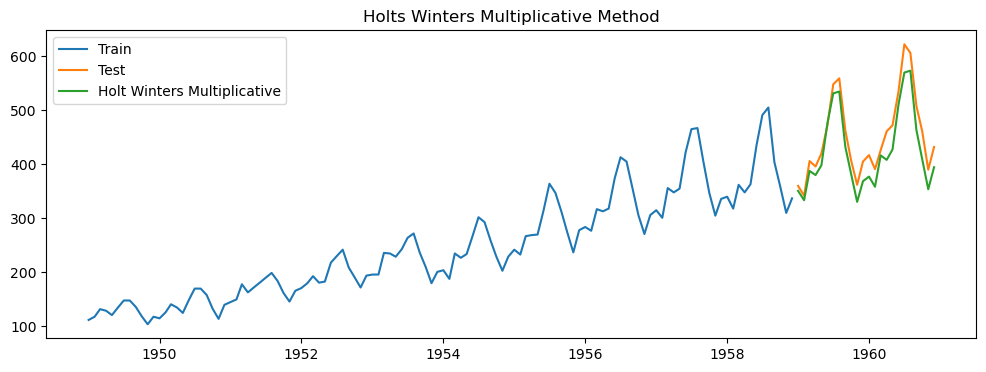

In [47]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hwa['hwa2_forecast'],label='Holt Winters Multiplicative')
plt.legend(loc='best')
plt.title("Holts Winters Multiplicative Method")
plt.show()

In [48]:
### Calculating the RMSE and MAPE to evaluate Holt Winters Multiplicative Method
rmse = np.round(np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa2_forecast'])),2)
mape = np.mean(np.abs(test['Passengers']- y_hat_hwa['hwa2_forecast'])/test['Passengers']*100).round(2)
results.loc[len(results)] = ['Holts Winters Multiplicative',mape,rmse]
results

,Method,MAPE,RMSE
0,Naive Method,23.63,137.51
1,Simple Average,44.28,219.69
2,Simple Moving Average,15.54,103.33
3,Simple Exponential Smoothing,16.49,107.65
4,Holts Exponential Smoothing,11.39,80.91
5,Holts Winters Additive,6.72,35.87
6,Holts Winters Multiplicative,6.45,32.45


# AUTO REGRESSIVE METHODS

#### AUGMENTED DICKEY FULLER TEST

In [49]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print("ADF Statistic: %f" %adf_test[0])
print("Critical value @0.05: %.2f" %adf_test[4]['5%'])
print("p-value: %f" %adf_test[1])

ADF Statistic: 0.894609
Critical value @0.05: -2.88
p-value: 0.993020


### KPSS Test

In [51]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS statistic: %f' %kpss_test[0])
print('Critical value @0.05: %.2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS statistic: 1.651190
Critical value @0.05: 0.46
p-value: 0.010000


C:\Users\Prince\AppData\Local\Temp\ipykernel_2108\2879793190.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data['Passengers'])


### BOX COX TRANSFORMATION

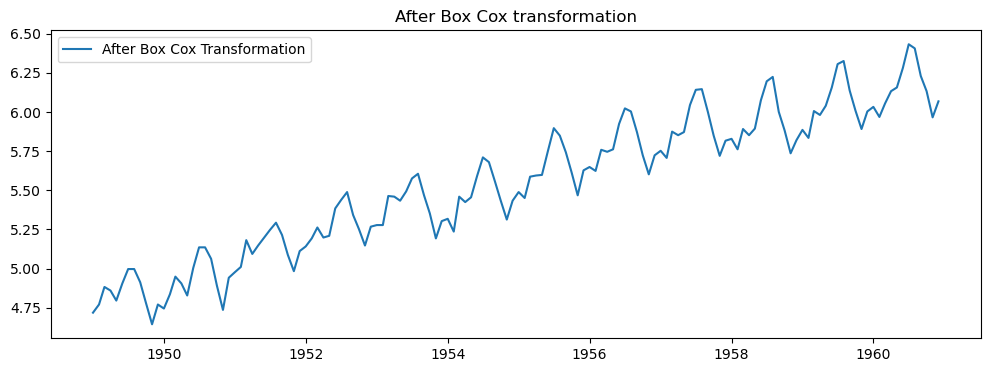

In [52]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'],lmbda=0),index=data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox,label='After Box Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox transformation')
plt.show()

### DIFFERENCING

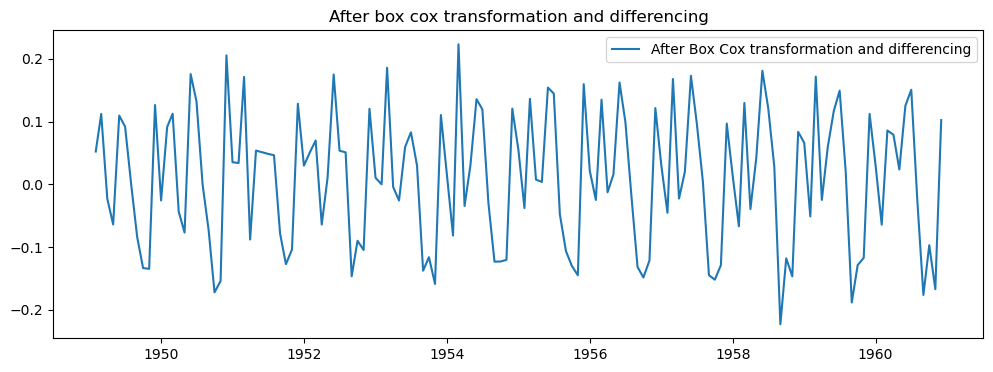

In [56]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(),index=data.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label='After Box Cox transformation and differencing')
plt.legend(loc='best')
plt.title('After box cox transformation and differencing')
plt.show()

### ADF TEST

In [57]:
adf_test = adfuller(data_boxcox_diff)

print("ADF Statistic: %f" %adf_test[0])
print("Critical value @0.05: %.2f" %adf_test[4]['5%'])
print("p-value: %f" %adf_test[1])

ADF Statistic: -3.290114
Critical value @0.05: -2.88
p-value: 0.015326


### KPSS TEST

In [58]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS statistic: %f' %kpss_test[0])
print('Critical value @0.05: %.2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS statistic: 0.038341
Critical value @0.05: 0.46
p-value: 0.100000


C:\Users\Prince\AppData\Local\Temp\ipykernel_2108\3290690344.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data_boxcox_diff)


### AUTOCORRELATION FUNCTION (ACF PLOT)

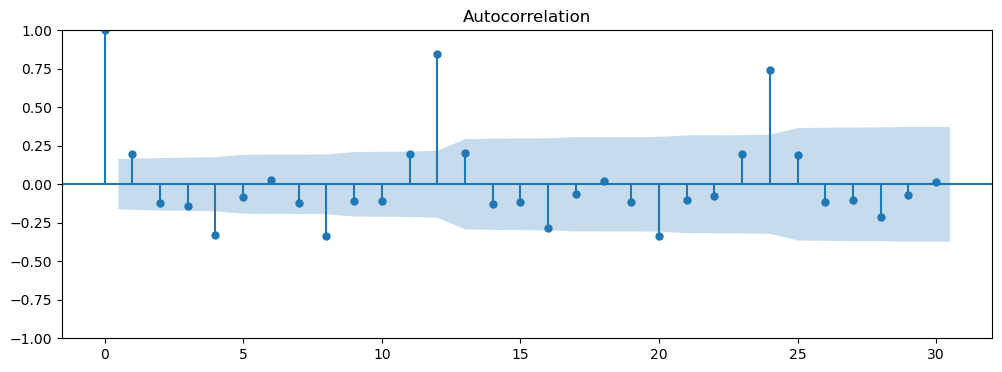

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff,ax = plt.gca(),lags=30)
plt.show()

### PARTIAL AUTOCORRELATION FUNCTION(PACF)

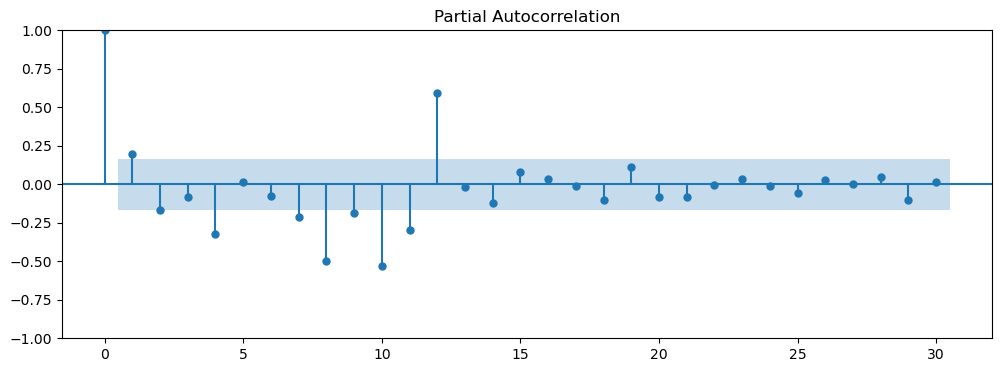

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff,ax = plt.gca(),lags=30)
plt.show()

### SPLIT INTO TRAINING AND TEST DATA SETS

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len]